In [6]:
import jax
import jax.numpy as jnp
import pandas as pd
import optax

import tensorflow_probability.substrates.jax as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

import matplotlib.pyplot as plt
from tqdm import trange

from laplax import ADLaplace
from laplax.utils import train_model

In [7]:
def get_likelihood(params, aux=None):
    return tfd.Bernoulli(probs=params['p_of_h'])

def prepare_model(config_name, bijector):
    config = pd.read_pickle(f'../data/coin_toss/{config_name}')
    data = config['data']
    a0 = config['prior']['alpha']
    b0 = config['prior']['beta']
    
    prior = {'p_of_h': tfd.Beta(a0, b0)}
    bijectors = {'p_of_h': bijector}
    
    
    return ADLaplace(prior, bijectors, get_likelihood), data

### coin_toss with change of variable

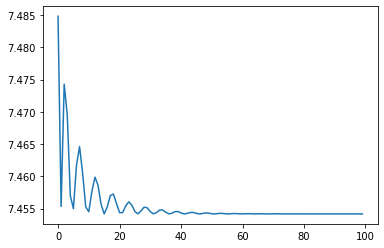

In [8]:
config_name = "coin_toss"
model, data = prepare_model(config_name=config_name, bijector=tfb.Sigmoid())
optimizer = optax.adam(learning_rate=0.1)
n_epochs = 100
seed = jax.random.PRNGKey(0)

params, losses = train_model(model, data, None, optimizer, n_epochs, seed)

plt.plot(losses)

posterior = model.apply(params, data)
pd.to_pickle(
    {"params": params, "model": model, "data": data},
    f"../results/coin_toss/results_data/laplax_{config_name}",
    protocol=1,
)

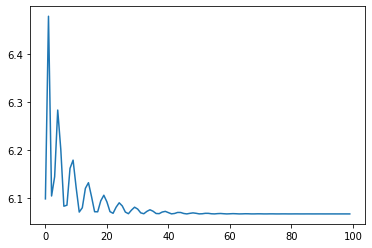

In [9]:
config_name = "coin_toss"
model, data = prepare_model(config_name=config_name, bijector=tfb.Identity())
optimizer = optax.adam(learning_rate=0.1)
n_epochs = 100
seed = jax.random.PRNGKey(0)

params, losses = train_model(model, data, None, optimizer, n_epochs, seed)

plt.plot(losses)

posterior = model.apply(params, data)
pd.to_pickle(
    {"params": params, "model": model, "data": data},
    f"../results/coin_toss/results_data/laplace_{config_name}",
    protocol=1,
)

### coin_toss1

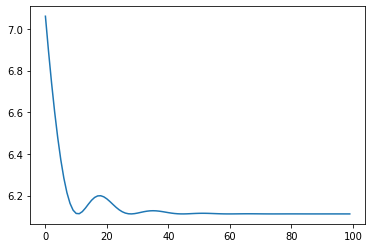

In [10]:
config_name = "coin_toss1"
model, data = prepare_model(config_name=config_name, bijector=tfb.Sigmoid())
optimizer = optax.adam(learning_rate=0.1)
n_epochs = 100
seed = jax.random.PRNGKey(0)

params, losses = train_model(model, data, None, optimizer, n_epochs, seed)

plt.plot(losses)

posterior = model.apply(params, data)
pd.to_pickle(
    {"params": params, "model": model, "data": data},
    f"../results/coin_toss/results_data/laplax_{config_name}",
    protocol=1,
)

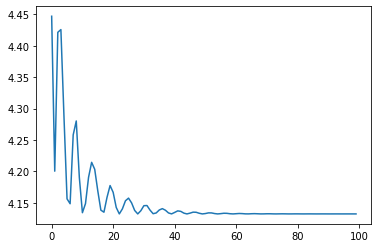

In [11]:
config_name = "coin_toss1"
model, data = prepare_model(config_name=config_name, bijector=tfb.Identity())
optimizer = optax.adam(learning_rate=0.1)
n_epochs = 100
seed = jax.random.PRNGKey(0)

params, losses = train_model(model, data, None, optimizer, n_epochs, seed)

plt.plot(losses)

posterior = model.apply(params, data)
pd.to_pickle(
    {"params": params, "model": model, "data": data},
    f"../results/coin_toss/results_data/laplace_{config_name}",
    protocol=1,
)